## Importing the Dataset
Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file. Execute the following script to do so:

In [93]:
# Importing required packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## Importing the Dataset
Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file. Execute the following script to do so:

In [94]:
df = pd.read_csv(r"C:\PGA32\MeriSkill\Project 2 - Diabetes Data\Project 2 MeriSKILL\diabetes.csv")

In [95]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [96]:
df.shape

(768, 9)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [98]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Missing Value Treatment

In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#calculating correlation among numeric variable 
corr_matrix = df.corr() 

filter_corr = corr_matrix[abs(corr_matrix) > 0.4]

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr, cmap="coolwarm", annot=True)

### Visualizing missing values, minimum value, maximum value, variance, standard deviation, 1st, 10th, 25th, 50th, 75th, 90th, 99th Histogram and Barplot graphs of percentiles, interquartile range (IQR), skewness

In [102]:
def univariate_numerical(data,var,graph_plot=True):
    missing=data[var].isnull().sum()
    min_n=data[var].min()
    max_n=data[var].max()
    var_n=data[var].var()
    std_n=data[var].std()
    p1=data[var].quantile(.01)
    p10=data[var].quantile(.1)
    p25=data[var].quantile(.25)
    p50=data[var].quantile(.5)
    p75=data[var].quantile(.75)
    p90=data[var].quantile(.9)
    p99=data[var].quantile(.99)
    iqr=p75-p25
    skewness=data[var].skew()
    
    if graph_plot==True:
        plt.hist(data[var])
        plt.show()
        sns.boxplot(y=data[var])
        plt.show()
        
    results={"missing":missing,"min":min_n,"max":max_n,"var":var_n,"std":std_n,
            "p1":p1,"p10":p10,"p25":p25,"p50":p50,"p75":p75,"p90":p90,"p99":p99,"skewness":skewness}
    return results

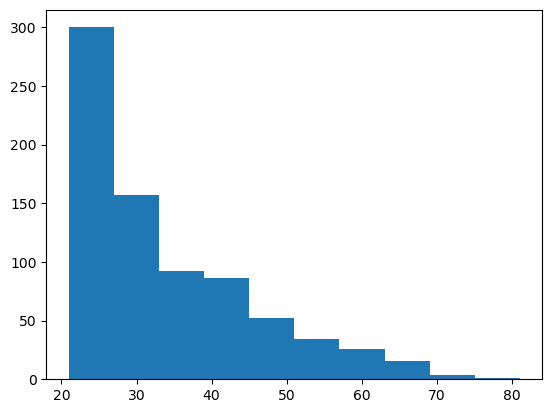

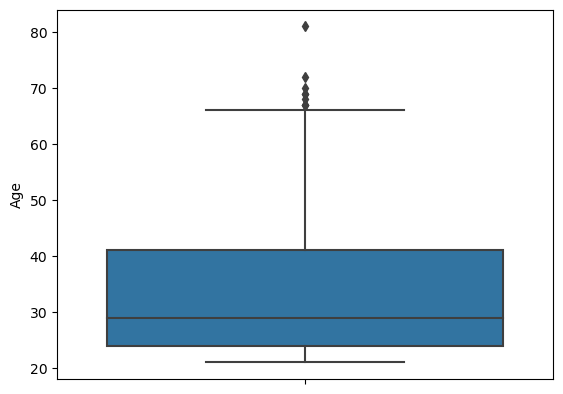

{'missing': 0,
 'min': 21,
 'max': 81,
 'var': 138.30304589037365,
 'std': 11.76023154067868,
 'p1': 21.0,
 'p10': 22.0,
 'p25': 24.0,
 'p50': 29.0,
 'p75': 41.0,
 'p90': 51.0,
 'p99': 67.0,
 'skewness': 1.1295967011444805}

In [103]:
univariate_numerical(data=df, var="Age")

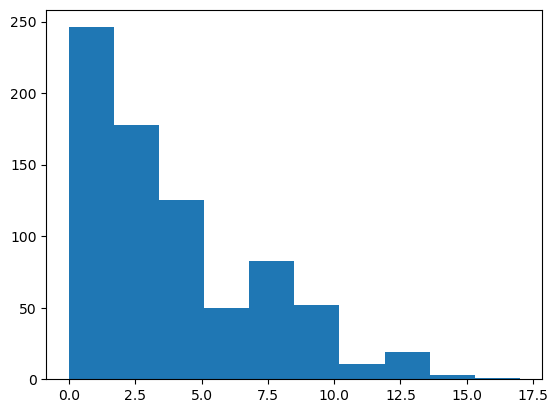

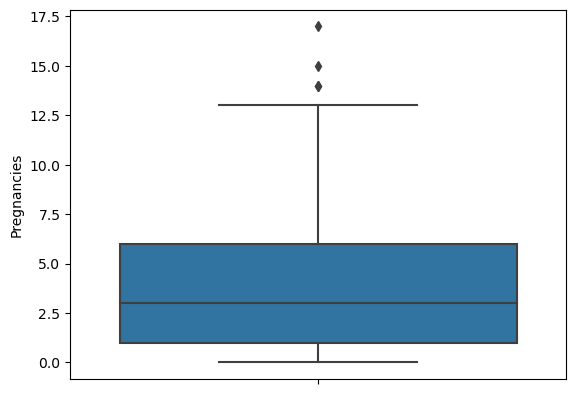

{'missing': 0,
 'min': 0,
 'max': 17,
 'var': 11.35405632062142,
 'std': 3.3695780626988623,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 1.0,
 'p50': 3.0,
 'p75': 6.0,
 'p90': 9.0,
 'p99': 13.0,
 'skewness': 0.9016739791518588}

In [104]:
univariate_numerical(data=df, var="Pregnancies")

In [105]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

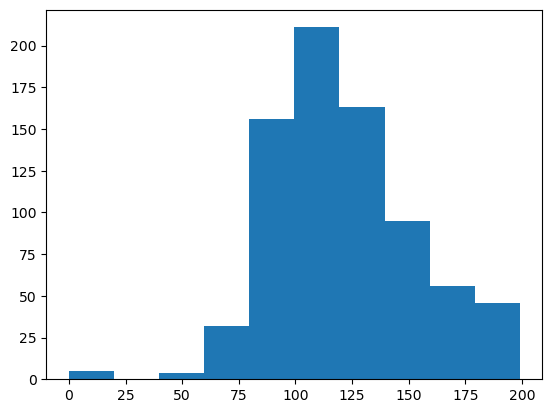

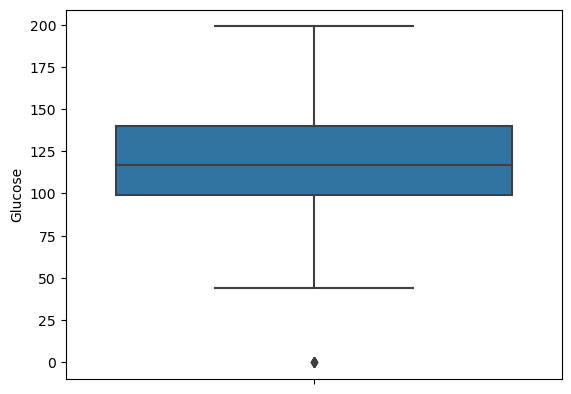

{'missing': 0,
 'min': 0,
 'max': 199,
 'var': 1022.2483142519557,
 'std': 31.97261819513622,
 'p1': 57.0,
 'p10': 85.0,
 'p25': 99.0,
 'p50': 117.0,
 'p75': 140.25,
 'p90': 167.0,
 'p99': 196.0,
 'skewness': 0.17375350179188992}

In [106]:
univariate_numerical(data=df, var="Glucose")

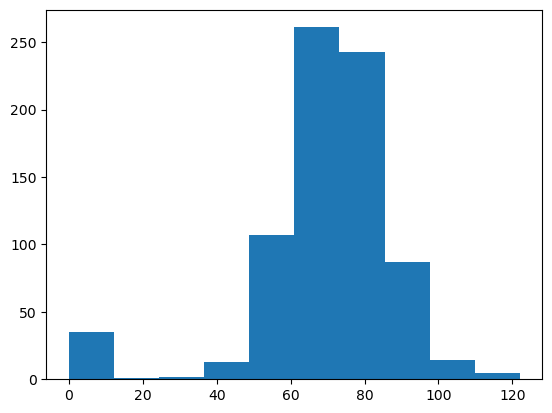

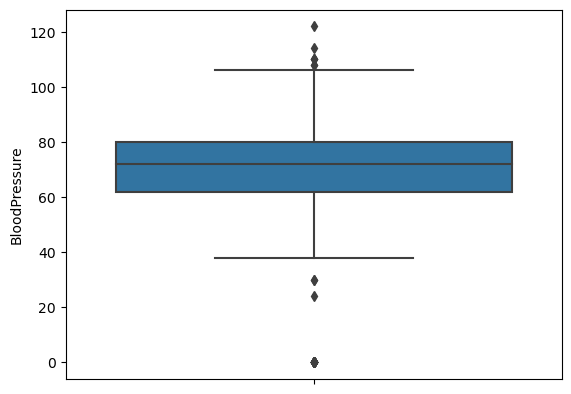

{'missing': 0,
 'min': 0,
 'max': 122,
 'var': 374.6472712271838,
 'std': 19.355807170644777,
 'p1': 0.0,
 'p10': 54.0,
 'p25': 62.0,
 'p50': 72.0,
 'p75': 80.0,
 'p90': 88.0,
 'p99': 106.0,
 'skewness': -1.8436079833551302}

In [107]:
univariate_numerical(data=df, var="BloodPressure")

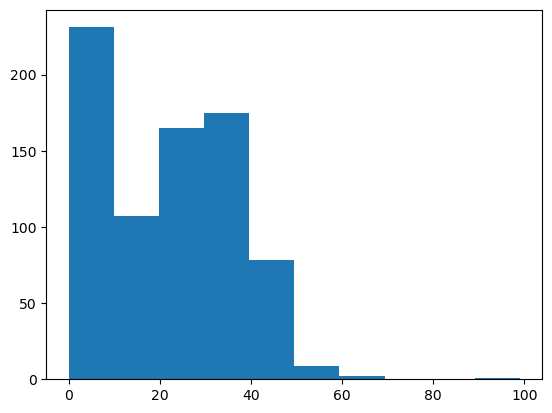

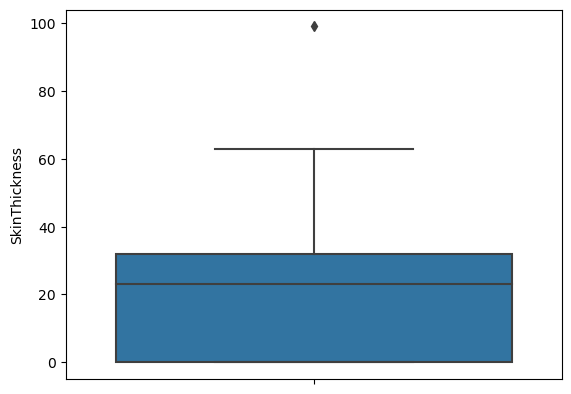

{'missing': 0,
 'min': 0,
 'max': 99,
 'var': 254.47324532811953,
 'std': 15.952217567727677,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 23.0,
 'p75': 32.0,
 'p90': 40.0,
 'p99': 51.33000000000004,
 'skewness': 0.10937249648187608}

In [108]:
univariate_numerical(data=df, var="SkinThickness")

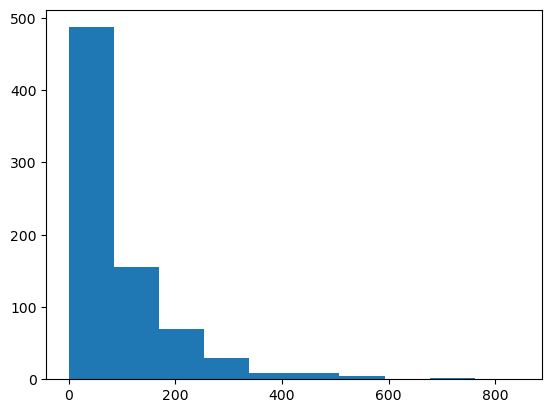

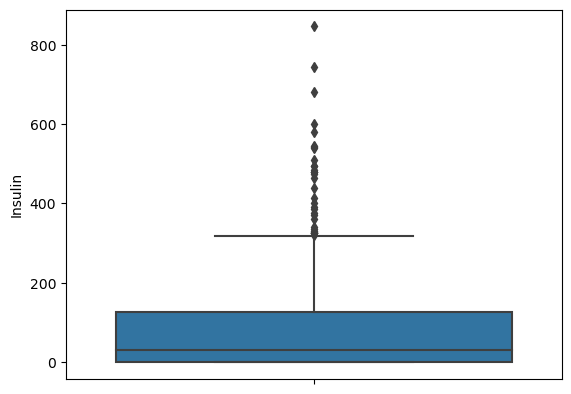

{'missing': 0,
 'min': 0,
 'max': 846,
 'var': 13281.180077955281,
 'std': 115.24400235133837,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 30.5,
 'p75': 127.25,
 'p90': 210.0,
 'p99': 519.9000000000012,
 'skewness': 2.272250858431574}

In [109]:
univariate_numerical(data=df, var="Insulin")

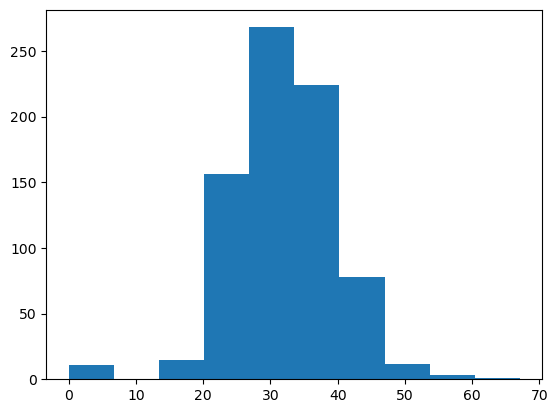

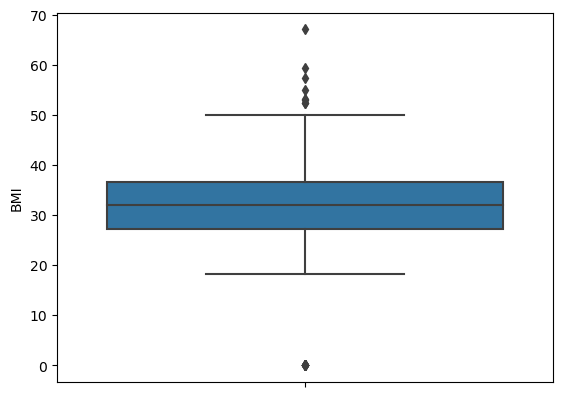

{'missing': 0,
 'min': 0.0,
 'max': 67.1,
 'var': 62.15998395738257,
 'std': 7.8841603203754405,
 'p1': 0.0,
 'p10': 23.6,
 'p25': 27.3,
 'p50': 32.0,
 'p75': 36.6,
 'p90': 41.5,
 'p99': 50.75900000000009,
 'skewness': -0.42898158845356543}

In [110]:
univariate_numerical(data=df, var="BMI")

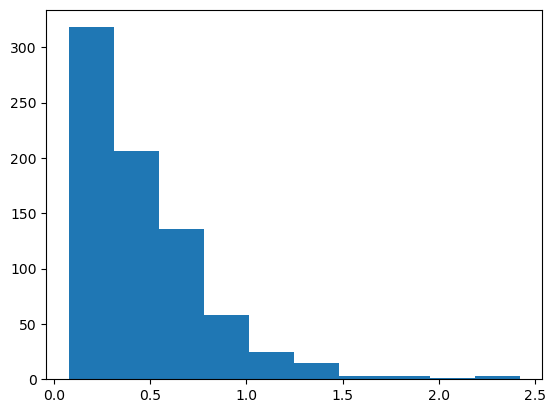

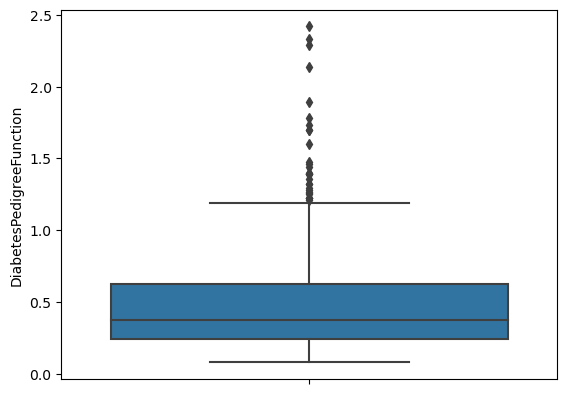

{'missing': 0,
 'min': 0.078,
 'max': 2.42,
 'var': 0.10977863787313938,
 'std': 0.33132859501277484,
 'p1': 0.09468,
 'p10': 0.165,
 'p25': 0.24375,
 'p50': 0.3725,
 'p75': 0.62625,
 'p90': 0.8786000000000002,
 'p99': 1.6983300000000001,
 'skewness': 1.919911066307204}

In [111]:
univariate_numerical(data=df, var="DiabetesPedigreeFunction")

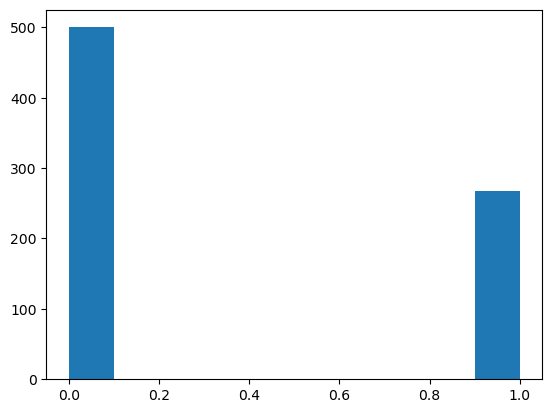

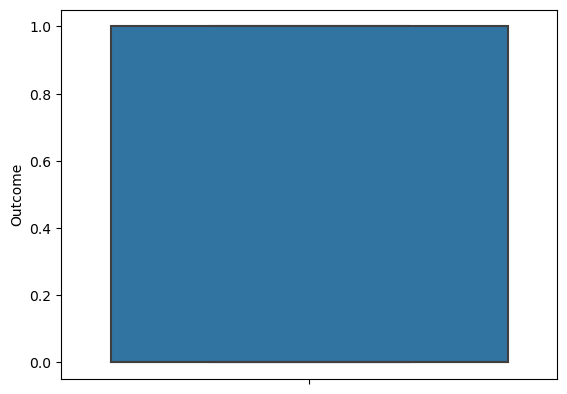

{'missing': 0,
 'min': 0,
 'max': 1,
 'var': 0.22748261625380098,
 'std': 0.4769513772427971,
 'p1': 0.0,
 'p10': 0.0,
 'p25': 0.0,
 'p50': 0.0,
 'p75': 1.0,
 'p90': 1.0,
 'p99': 1.0,
 'skewness': 0.635016643444986}

In [112]:
univariate_numerical(data=df, var="Outcome")

### BarGraph Numerical Features

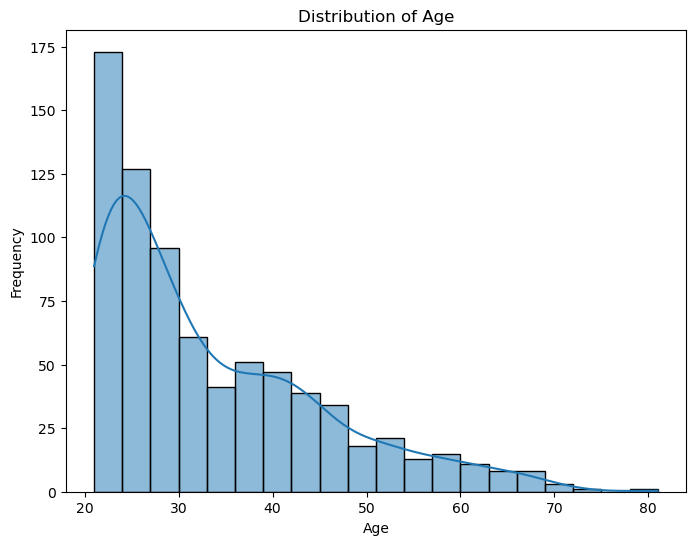

In [113]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

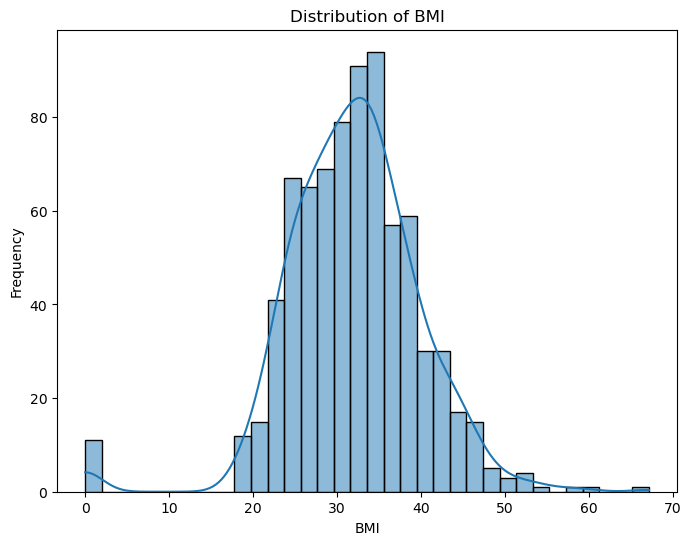

In [114]:
plt.figure(figsize=(8,6))
sns.histplot(df["BMI"],  kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

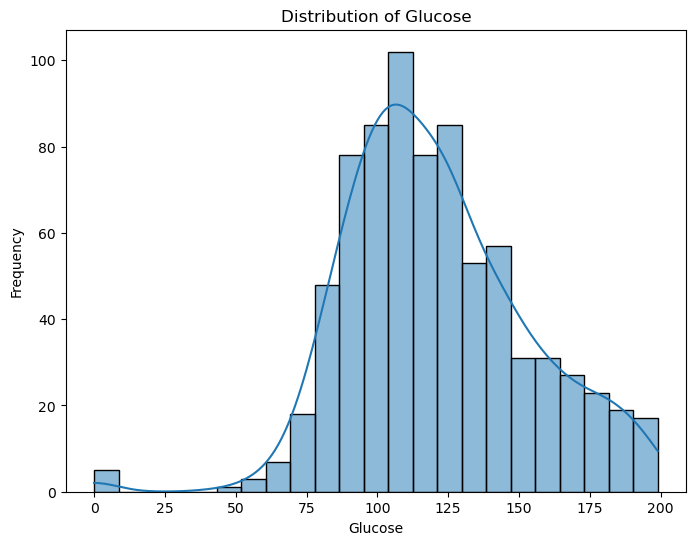

In [115]:
plt.figure(figsize=(8,6))
sns.histplot(df["Glucose"],  kde=True)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')
plt.show()

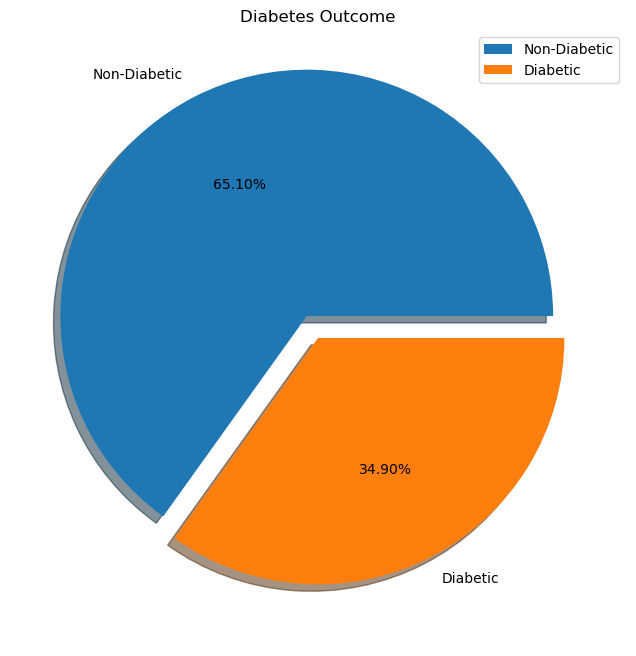

In [116]:
plt.figure(figsize = (10, 8))
plt.title('Diabetes Outcome')
plt.pie(df['Outcome'].value_counts(), labels = ['Non-Diabetic', 'Diabetic'], explode = (0.1, 0.0), autopct = '%1.2f%%', shadow = True)
plt.legend(loc = 'best')
plt.show()

### There is no statistically significant relationship between the "outcome" and "BMI" variables.

In [117]:
from scipy import stats
figure=pd.crosstab(df["Outcome"], df["Age"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=140.9375197044156, pvalue=2.3069818149863462e-10, dof=51, expected_freq=array([[41.015625  , 46.875     , 24.73958333, 29.94791667, 31.25      ,
        21.484375  , 20.83333333, 22.78645833, 18.88020833, 13.671875  ,
        15.625     , 10.41666667, 11.06770833,  9.11458333,  6.51041667,
        10.41666667, 12.36979167, 10.41666667,  7.8125    ,  8.46354167,
        14.32291667, 11.71875   ,  8.46354167,  5.20833333,  9.765625  ,
         8.46354167,  3.90625   ,  3.25520833,  3.25520833,  5.20833333,
         5.20833333,  5.20833333,  3.25520833,  3.90625   ,  2.60416667,
         1.953125  ,  3.25520833,  4.55729167,  1.953125  ,  3.25520833,
         1.30208333,  2.60416667,  2.60416667,  0.65104167,  1.953125  ,
         2.60416667,  1.953125  ,  0.65104167,  1.30208333,  0.65104167,
         0.65104167,  0.65104167],
       [21.984375  , 25.125     , 13.26041667, 16.05208333, 16.75      ,
        11.515625  , 11.16666667, 12.21354167, 10.11979167

### There is a statistically significant relationship between the "Outcome" and "BMI" variables.

In [118]:
from scipy import stats
figure=pd.crosstab(df["Outcome"], df["BMI"])
stats.chi2_contingency(figure)

Chi2ContingencyResult(statistic=286.47025313790687, pvalue=0.04282346357874613, dof=247, expected_freq=array([[7.16145833, 1.953125  , 0.65104167, 0.65104167, 0.65104167,
        0.65104167, 1.30208333, 1.953125  , 0.65104167, 0.65104167,
        0.65104167, 1.30208333, 1.30208333, 1.30208333, 2.60416667,
        0.65104167, 0.65104167, 3.25520833, 1.953125  , 1.30208333,
        1.30208333, 0.65104167, 1.30208333, 1.953125  , 1.30208333,
        0.65104167, 1.30208333, 1.30208333, 2.60416667, 1.953125  ,
        1.30208333, 0.65104167, 1.953125  , 1.953125  , 1.30208333,
        1.30208333, 1.30208333, 2.60416667, 0.65104167, 3.90625   ,
        2.60416667, 1.953125  , 0.65104167, 2.60416667, 3.25520833,
        1.953125  , 0.65104167, 3.90625   , 1.953125  , 3.90625   ,
        1.30208333, 2.60416667, 1.30208333, 3.90625   , 1.30208333,
        4.55729167, 2.60416667, 1.953125  , 2.60416667, 0.65104167,
        1.953125  , 1.953125  , 2.60416667, 0.65104167, 2.60416667,
        0.651

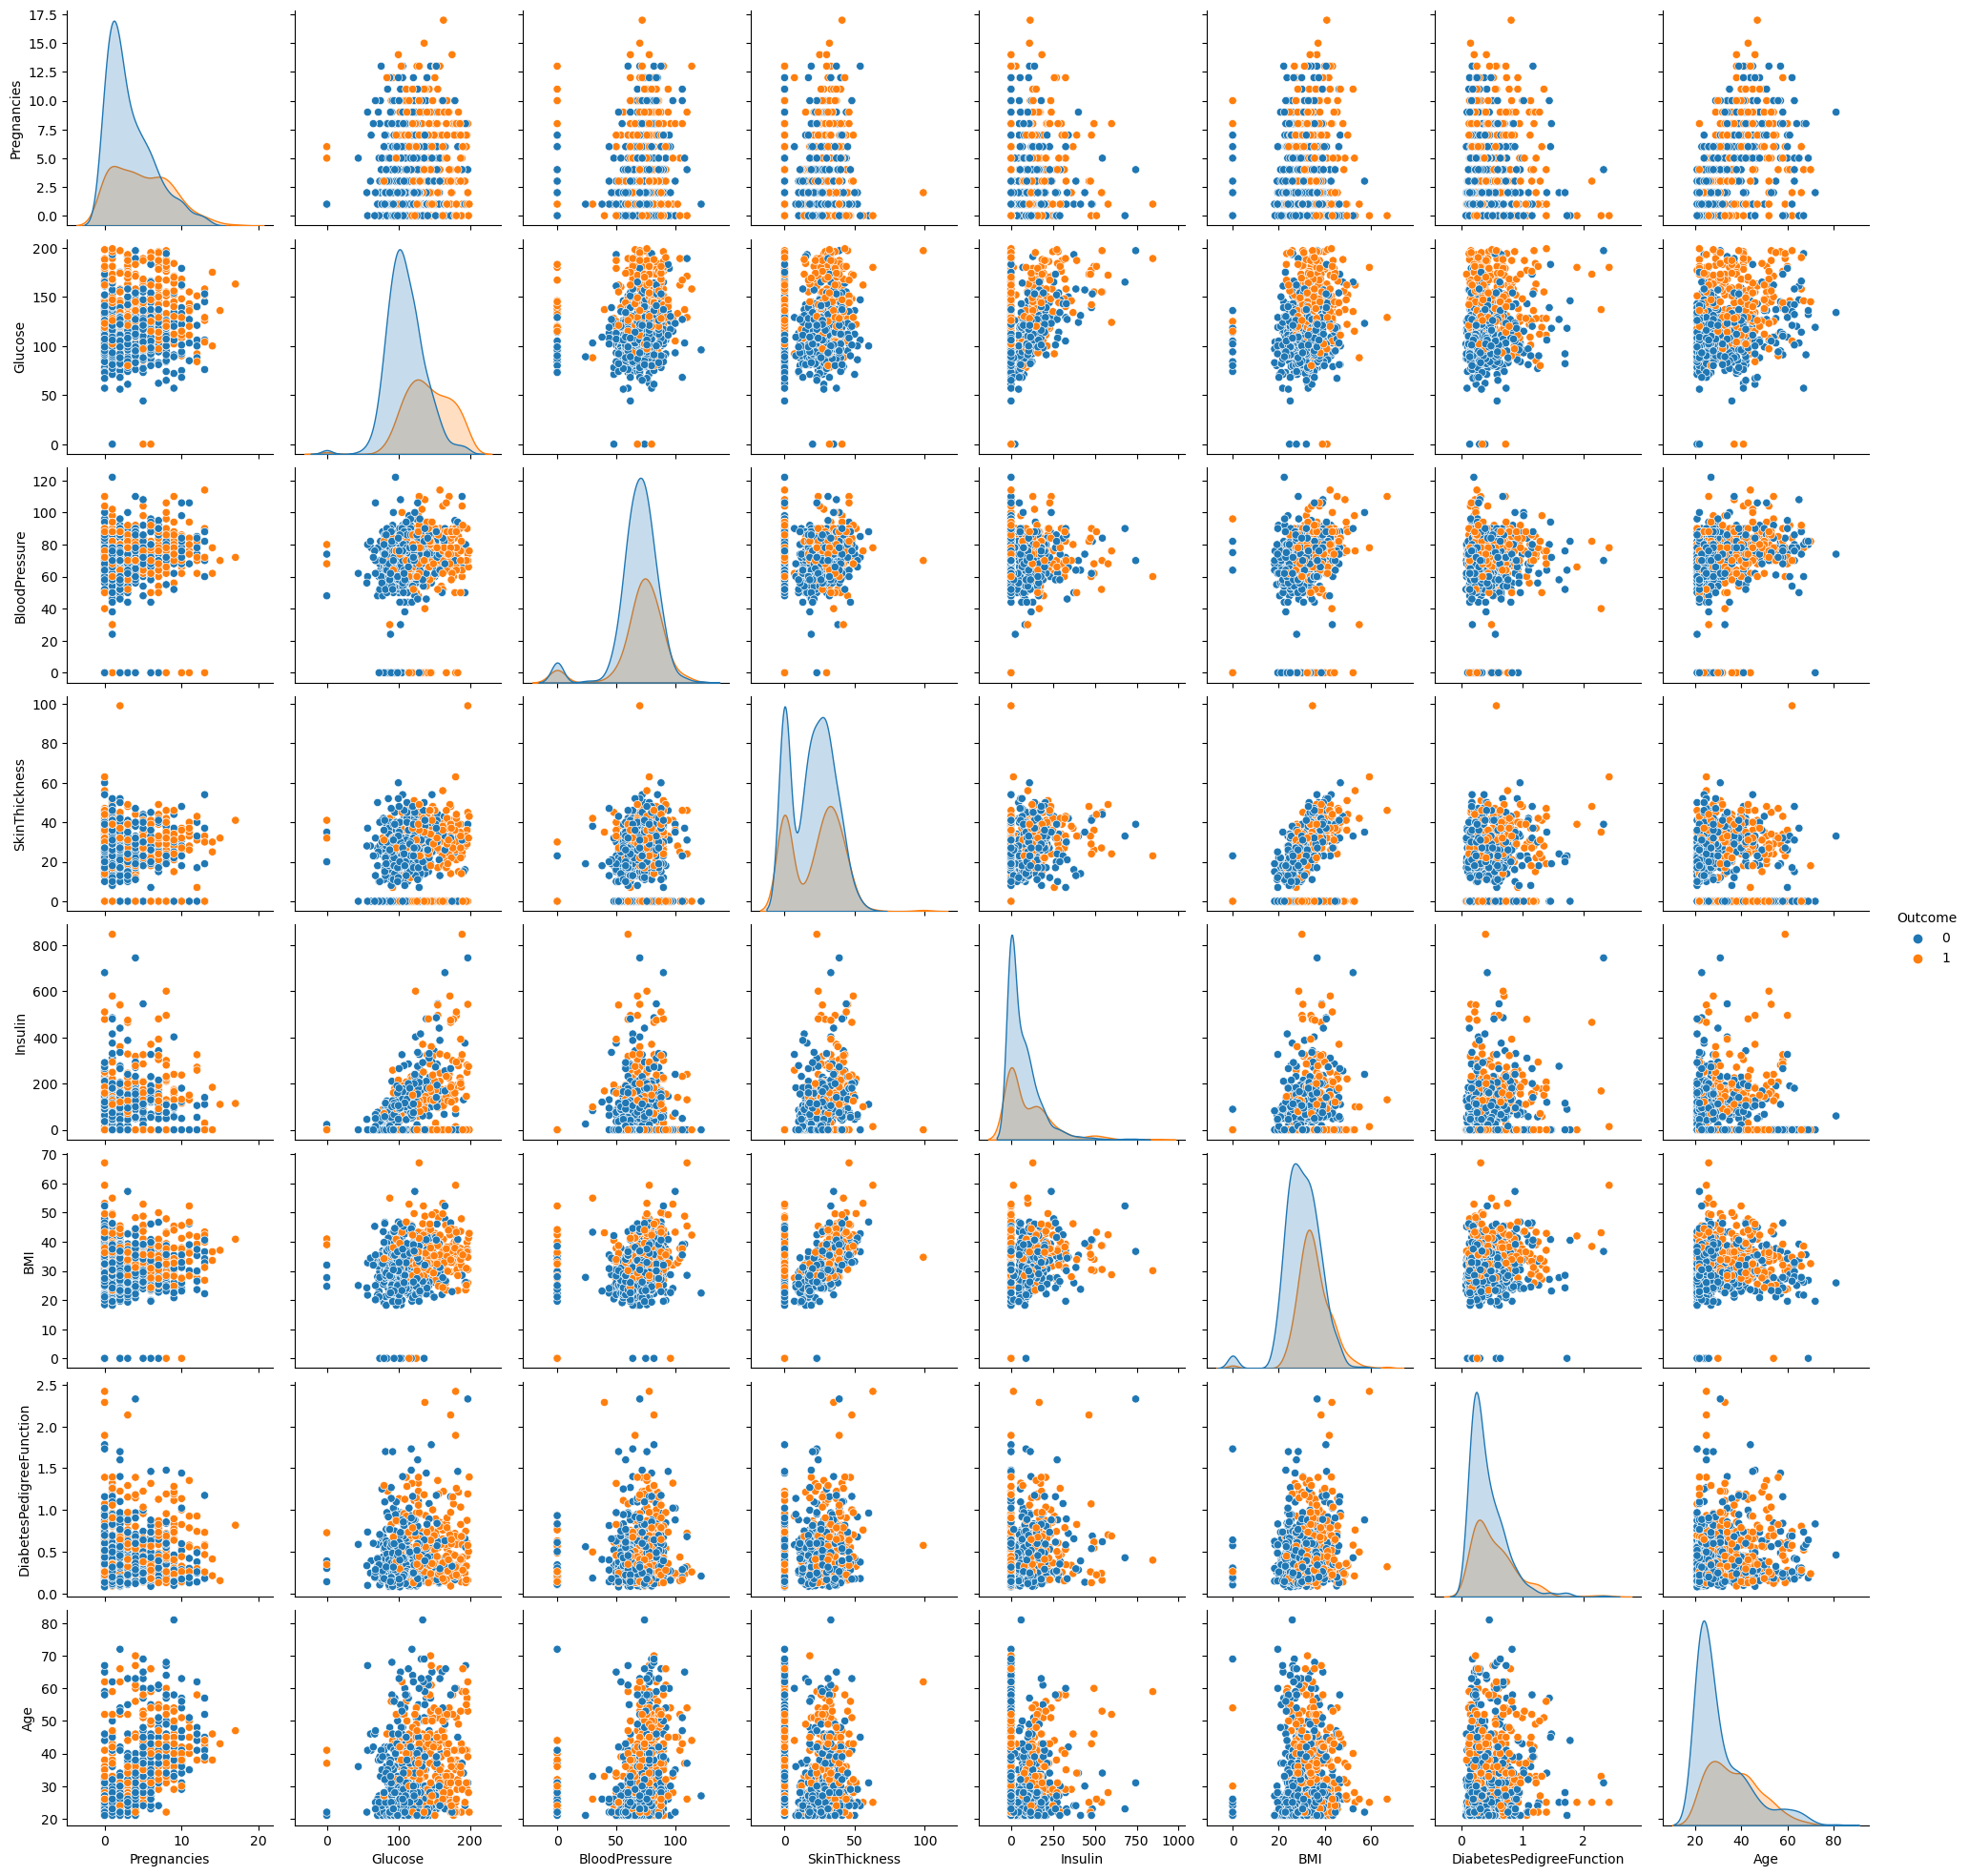

In [119]:
# I am visualizing the correlation of the dataset with the seaborn library.
sns.pairplot(df, hue = "Outcome")
plt.show()

In [120]:
d=df.corr()
def mylight(x):
    color="yellow" if abs(x)>=.6 else ""
    return "background-color: {}".format(color)

In [121]:
d.style.applymap(mylight)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

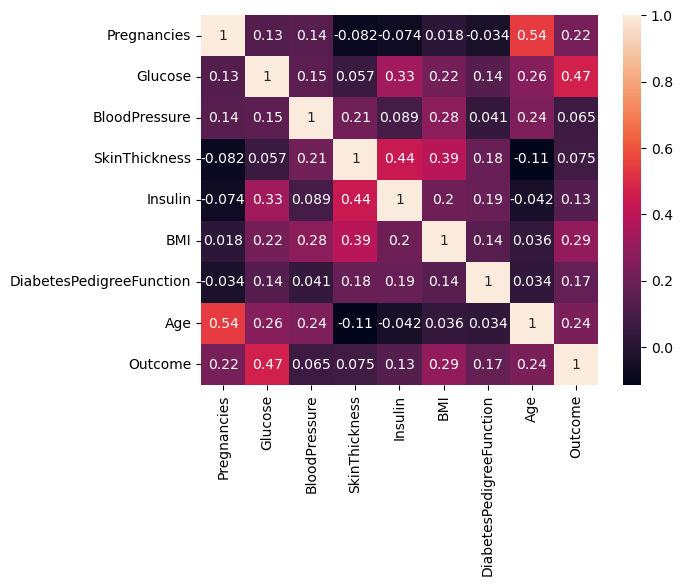

In [128]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them.

In [29]:
df_droping=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [30]:
df_droping

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148,35,33.6,50,1
1,1,85,29,26.6,31,0
2,8,183,0,23.3,32,1
3,1,89,23,28.1,21,0
4,0,137,35,43.1,33,1
...,...,...,...,...,...,...
763,10,101,48,32.9,63,0
764,2,122,27,36.8,27,0
765,5,121,23,26.2,30,0
766,1,126,0,30.1,47,1


### Dummy Creation

In [31]:
dfs=pd.get_dummies(df_droping, columns=['Pregnancies', 'Glucose','SkinThickness','BMI','Age'],
              drop_first=True)

In [32]:
dfs

,Outcome,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,...,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Age_72,Age_81
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
764,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# Separate the features (X) from the target (y)

X = dfs.drop(columns=['Outcome'])  # Features
y = dfs['Outcome']  # Target

In [35]:
# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [36]:
X = scaler.fit_transform(X)

# Logistic Regression

In [37]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

### Split data into training and testing sets

In [38]:
X_train, X_test, y_train, y_test= train_test_split(X ,y, test_size = 0.2, random_state=0)
                                                                    #splitting data in 80% train, 20%test

In [39]:
Log_model = LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [40]:
print("Train score", Log_model.score(X_train, y_train))
print("Test score", Log_model.score(X_test, y_test))

Train score 1.0
Test score 0.7142857142857143


In [41]:
Lr_pred=Log_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       107
           1       0.53      0.62      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.68       154
weighted avg       0.73      0.71      0.72       154


 F1:
 0.5686274509803921

 Precision score is:
 0.5272727272727272

 Recall score is:
 0.6170212765957447

 Accuracy score is:
 0.7142857142857143

 Confusion Matrix:



Text(0.5, 1.0, 'Confusion matrix of Logistic Regression')

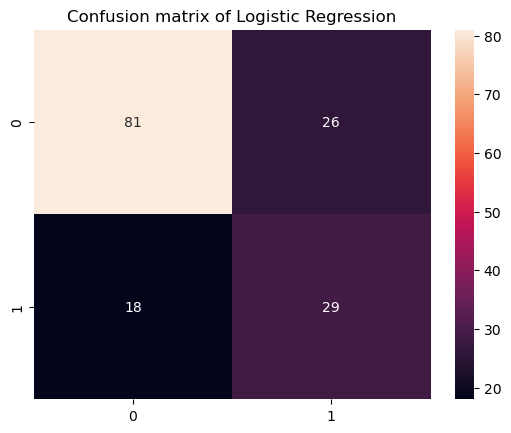

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,Lr_pred)

print("Classification Report is:\n",classification_report(y_test,Lr_pred))

print("\n F1:\n",f1_score(y_test,Lr_pred))

print("\n Precision score is:\n",precision_score(y_test,Lr_pred))

print("\n Recall score is:\n",recall_score(y_test,Lr_pred))

print("\n Accuracy score is:\n", accuracy_score(y_test,Lr_pred))

print("\n Confusion Matrix:\n")

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Logistic Regression') # fmt='d' formats the numbers as digits, which means integers

Accuracy: 0.7142857142857143
AUC Score: 0.7381189103201433


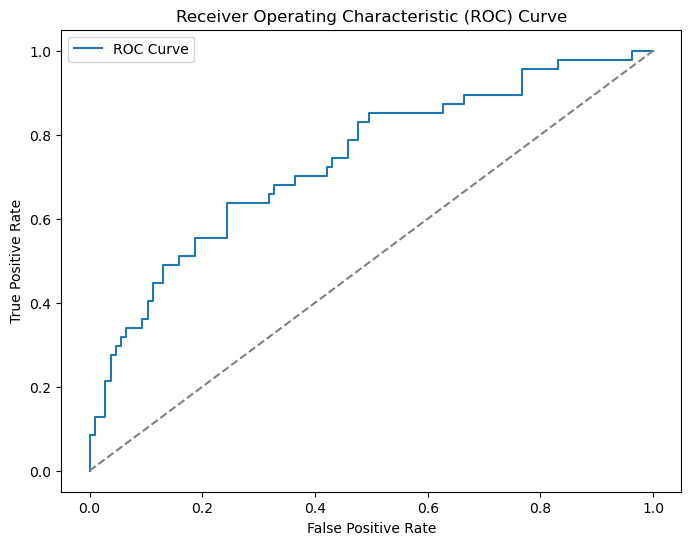

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


# Make Predictions
Lr_pred = Log_model.predict(X_test)
y_prob = Log_model.predict_proba(X_test)[:, 1]

#  Evaluate the Model
accuracy = accuracy_score(y_test, Lr_pred)
auc_score = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'AUC Score: {auc_score}')

#  Plot the ROC Curve 
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=100, min_samples_leaf=15)
dt.fit(X_train, y_train)
print("Train score :", dt.score(X_train, y_train))
print("Test score :", dt.score(X_test, y_test))

Train score : 0.6612377850162866
Test score : 0.7012987012987013


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# parameters = {'criterion':('gini', 'entropy'),
#              'max_depth': [5, 10, 20,25],
#               'min_samples_leaf': [10, 20, 50, 100,120]
#             }


In [49]:
tr = DecisionTreeClassifier(random_state=42)

In [50]:
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]}

In [51]:
gsearch = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [52]:
best_model=gsearch.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [53]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.73      0.82      0.78       107
           1       0.44      0.32      0.37        47

    accuracy                           0.67       154
   macro avg       0.59      0.57      0.57       154
weighted avg       0.64      0.67      0.65       154


 F1:
 0.37037037037037035

 Precision score is:
 0.4411764705882353

 Recall score is:
 0.3191489361702128

 Accuracy score is:
 0.6688311688311688

 Confusion Matrix:



Text(0.5, 1.0, 'Confusion matrix of Decision Tree')

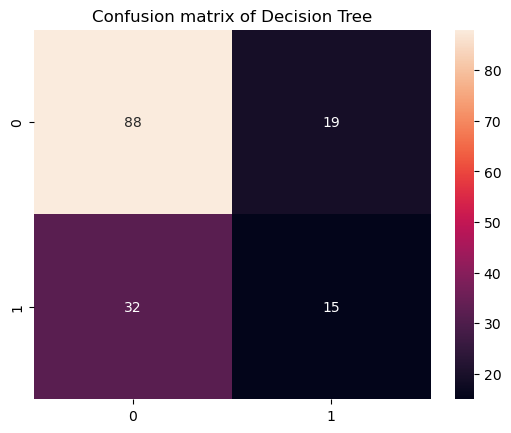

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,dt_pred)

print("Classification Report is:\n",classification_report(y_test,dt_pred))

print("\n F1:\n",f1_score(y_test,dt_pred))

print("\n Precision score is:\n",precision_score(y_test,dt_pred))

print("\n Recall score is:\n",recall_score(y_test,dt_pred))

print("\n Accuracy score is:\n", accuracy_score(y_test,dt_pred))

print("\n Confusion Matrix:\n")

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Decision Tree') # fmt='d' formats the numbers as digits, which means integers

Accuracy: 0.6688311688311688
AUC Score: 0.5965400676078744


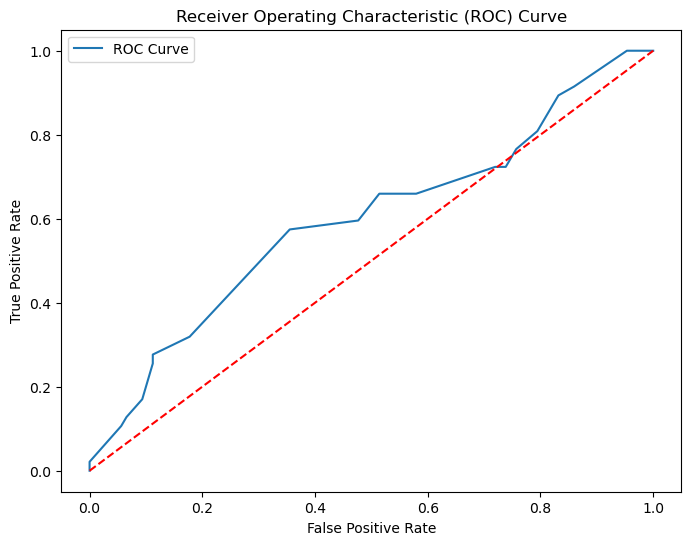

In [55]:
# Predictions
dt_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Evaluate the Model
accuracy = accuracy_score(y_test, dt_pred)
auc_score = roc_auc_score(y_test, y_probs)

print(f'Accuracy: {accuracy}')
print(f'AUC Score: {auc_score}')

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
rf.score(X_train,y_train)

1.0

In [59]:
rf.score(X_test,y_test)

0.7207792207792207

### Hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
# define models and parameters
model = RandomForestClassifier()

In [62]:
parameters={"n_estimators":[900],
            "max_features":['sqrt', 'log2'],
            "bootstrap" : [True]}

In [63]:
# define grid search
grid_search = GridSearchCV(model, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': ['sqrt', 'log2'],
                         'n_estimators': [900]},
             scoring='accuracy')

In [64]:
print("Train score ", grid_search.score(X_train, y_train))
print("Test Score", grid_search.score(X_test, y_test))

Train score  1.0
Test Score 0.7337662337662337


In [65]:
grid_search.best_score_

0.6644408903105425

In [66]:
rf_pred=grid_search.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       107
           1       0.62      0.32      0.42        47

    accuracy                           0.73       154
   macro avg       0.69      0.62      0.62       154
weighted avg       0.71      0.73      0.70       154


 F1:
 0.4225352112676056

 Precision score is:
 0.625

 Recall score is:
 0.3191489361702128

 Accuracy score is:
 0.7337662337662337

 Confusion Matrix:



Text(0.5, 1.0, 'Confusion matrix of Randon forest')

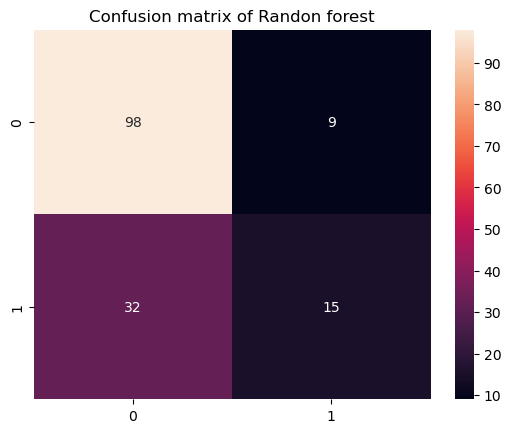

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,rf_pred)

print("Classification Report is:\n",classification_report(y_test,rf_pred))

print("\n F1:\n",f1_score(y_test,rf_pred))

print("\n Precision score is:\n",precision_score(y_test,rf_pred))

print("\n Recall score is:\n",recall_score(y_test,rf_pred))

print("\n Accuracy score is:\n", accuracy_score(y_test,rf_pred))

print("\n Confusion Matrix:\n")

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of Randon forest') # fmt='d' formats the numbers as digits, which means integers


Accuracy: 0.7337662337662337
AUC Score: 0.7362298667727184


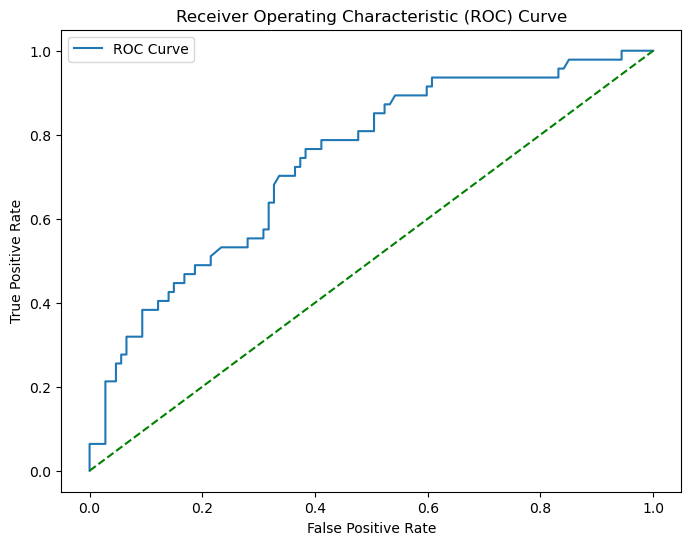

In [68]:
# Predictions
rf_pred = grid_search.predict(X_test)
y_prob_s = grid_search.predict_proba(X_test)[:, 1]

# Evaluate the Model
accuracy = accuracy_score(y_test, rf_pred)
auc_score = roc_auc_score(y_test, y_prob_s)

print(f'Accuracy: {accuracy}')
print(f'AUC Score: {auc_score}')

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_s)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# K-Nearest Neighbors (KNN)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
k = 8 # Choose an appropriate value for K

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [71]:
y_pred=knn.predict(X_test)

In [72]:
print("Train score", knn.score(X_train, y_train))
print("Test score", knn.score(X_test, y_test))

Train score 0.6563517915309446
Test score 0.7012987012987013


Classification Report is:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       107
           1       1.00      0.02      0.04        47

    accuracy                           0.70       154
   macro avg       0.85      0.51      0.43       154
weighted avg       0.79      0.70      0.58       154


 F1:
 0.04166666666666667

 Precision score is:
 1.0

 Recall score is:
 0.02127659574468085

 Accuracy score is:
 0.7012987012987013

 Confusion Matrix:



Text(0.5, 1.0, 'Confusion matrix of KNN')

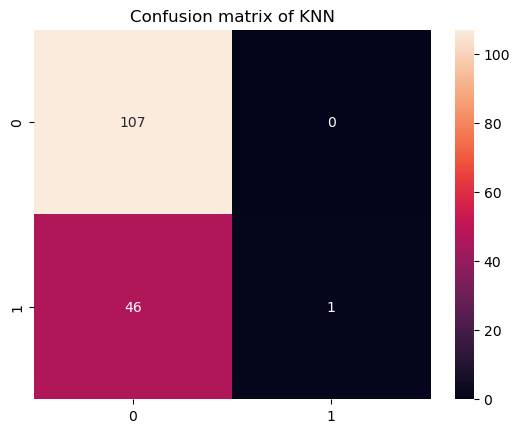

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print("Classification Report is:\n",classification_report(y_test,y_pred))

print("\n F1:\n",f1_score(y_test,y_pred))

print("\n Precision score is:\n",precision_score(y_test,y_pred))

print("\n Recall score is:\n",recall_score(y_test,y_pred))

print("\n Accuracy score is:\n", accuracy_score(y_test,y_pred))

print("\n Confusion Matrix:\n")

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of KNN') # fmt='d' formats the numbers as digits, which means integers


Accuracy: 0.7012987012987013
AUC Score: 0.6537084907536289


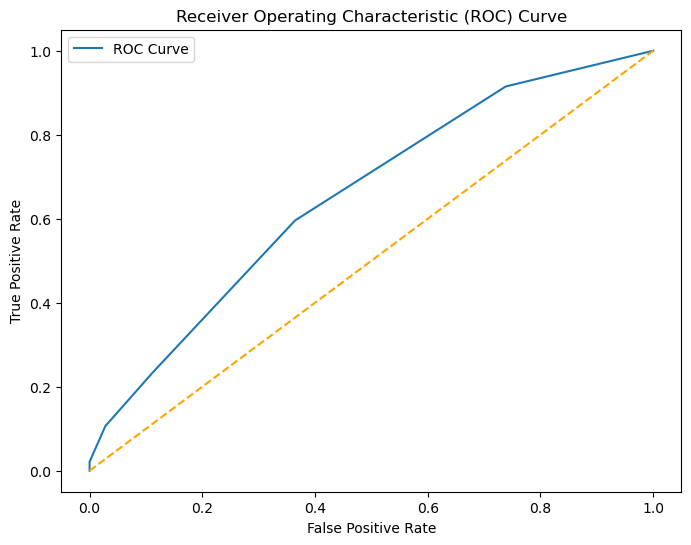

In [74]:
# Predictions
y_pred = knn.predict(X_test)
y_prob__s = knn.predict_proba(X_test)[:, 1]

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob__s)

print(f'Accuracy: {accuracy}')
print(f'AUC Score: {auc_score}')

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob__s)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [75]:
iteration = 9
error_rate = []
acc = []
scores = {}

for i in range(1,iteration):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    scores[i] = accuracy_score(y_test, y_pred)
    acc.append(accuracy_score(y_test, y_pred))
    
scores

{1: 0.6493506493506493,
 2: 0.7012987012987013,
 3: 0.6558441558441559,
 4: 0.7012987012987013,
 5: 0.6883116883116883,
 6: 0.7142857142857143,
 7: 0.7077922077922078,
 8: 0.7012987012987013}

Minimum error:- 0.2857142857142857 at K = 5


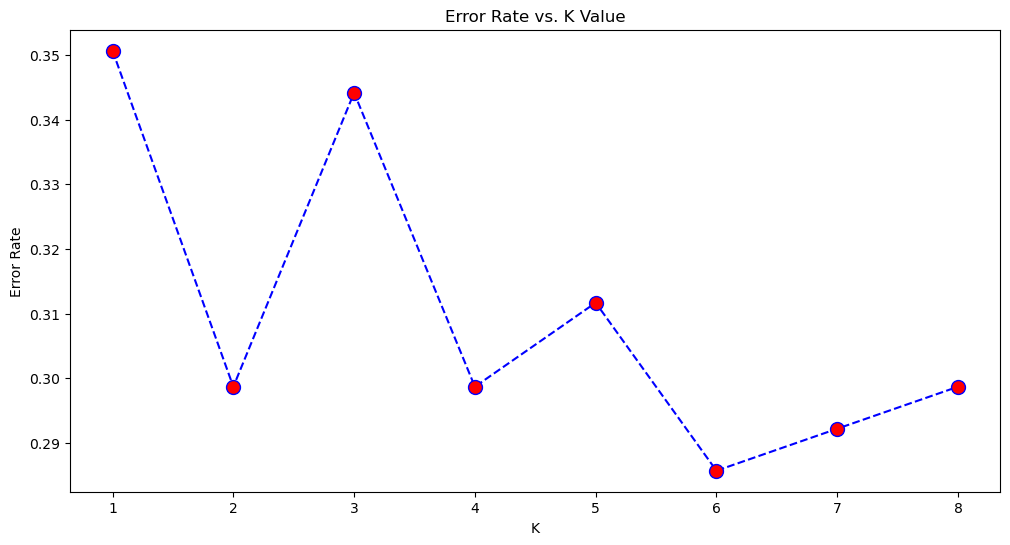

In [76]:
plt.figure(figsize=(12,6))
plt.plot(range(1,iteration), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Support Vector Machine (SVM)

In [77]:
from sklearn.svm import SVC

In [78]:
Sprt_VM = SVC(kernel='linear', C=1.0)
Sprt_VM.fit(X_train, y_train)

SVC(kernel='linear')

In [79]:
y_svm_pred = Sprt_VM.predict(X_test)

In [80]:
print("Train score", Sprt_VM.score(X_train, y_train))
print("Test score", Sprt_VM.score(X_test, y_test))

Train score 1.0
Test score 0.6428571428571429


Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       107
           1       0.44      0.60      0.50        47

    accuracy                           0.64       154
   macro avg       0.61      0.63      0.61       154
weighted avg       0.68      0.64      0.65       154


 F1:
 0.5045045045045045

 Precision score is:
 0.4375

 Recall score is:
 0.5957446808510638

 Accuracy score is:
 0.6428571428571429

 Confusion Matrix:



Text(0.5, 1.0, 'Confusion matrix of SVM')

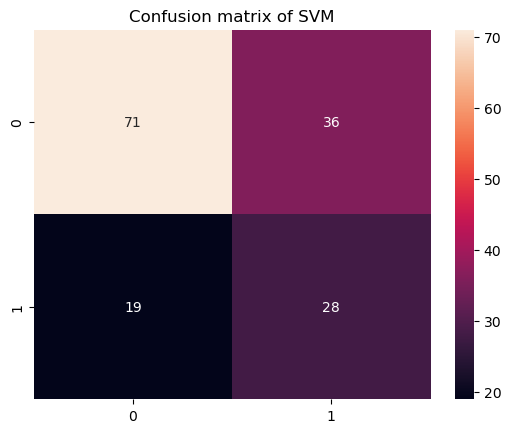

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_svm_pred)

print("Classification Report is:\n",classification_report(y_test,y_svm_pred))

print("\n F1:\n",f1_score(y_test,y_svm_pred))

print("\n Precision score is:\n",precision_score(y_test,y_svm_pred))

print("\n Recall score is:\n",recall_score(y_test,y_svm_pred))

print("\n Accuracy score is:\n", accuracy_score(y_test,y_svm_pred))

print("\n Confusion Matrix:\n")

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM') # fmt='d' formats the numbers as digits, which means integers


# Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [84]:
print("Train score ", nb.score(X_train, y_train))
print("Test Score", nb.score(X_test, y_test))

Train score  0.757328990228013
Test Score 0.6038961038961039


In [85]:
y_preds = nb.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.51      0.64       107
           1       0.42      0.81      0.55        47

    accuracy                           0.60       154
   macro avg       0.64      0.66      0.60       154
weighted avg       0.73      0.60      0.62       154


 F1:
 0.5547445255474452

 Precision score is:
 0.4222222222222222

 Recall score is:
 0.8085106382978723

 Accuracy score is:
 0.6038961038961039

 Confusion Matrix:



Text(0.5, 1.0, 'Confusion matrix of Naive Bayes')

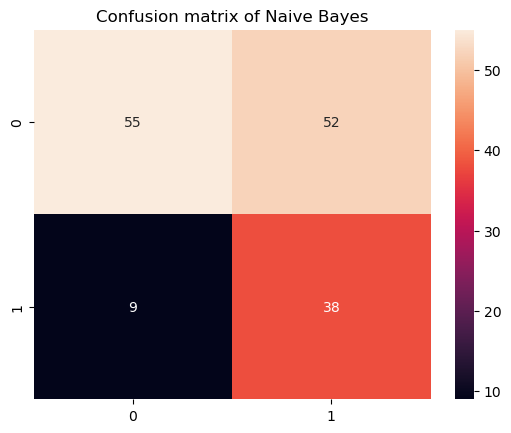

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

c_m = confusion_matrix(y_test,y_preds)

print("Classification Report is:\n",classification_report(y_test,y_preds))

print("\n F1:\n",f1_score(y_test,y_preds))

print("\n Precision score is:\n",precision_score(y_test,y_preds))

print("\n Recall score is:\n",recall_score(y_test,y_preds))

print("\n Accuracy score is:\n", accuracy_score(y_test,y_preds))

print("\n Confusion Matrix:\n")

sns.heatmap(c_m, annot=True, fmt='d').set_title('Confusion matrix of Naive Bayes') # fmt='d' formats the numbers as digits, which means integers


Accuracy: 0.6038961038961039
AUC Score: 0.6612646649433287


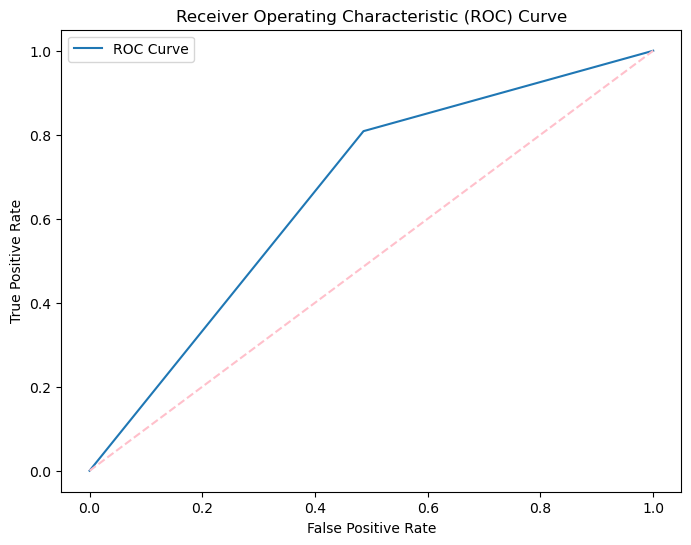

In [87]:
# Predictions
y_preds = nb.predict(X_test)
y_probss = nb.predict_proba(X_test)[:, 1]

# Evaluate the Model
accuracy = accuracy_score(y_test, y_preds)
auc_score = roc_auc_score(y_test, y_probss)

print(f'Accuracy: {accuracy}')
print(f'AUC Score: {auc_score}')

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probss)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='pink')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### All Train, Test Accuracy Reports through visualization

In [88]:
data = {'Models' : ["Logistic_Regression_Model", "Decision_Tree_Model", "Random_Forest_Model", "Support_Vector_Machine", "K-Nearest_Neighbours","Naive Bayes"],
'Train' : [1.00, 0.66, 1.00, 1.00, 0.65, 0.75],
'Test' : [0.71, 0.70, 0.73, 0.64, 0.70, 0.60]}

In [89]:
df = pd.DataFrame(data)

In [90]:
df

,Models,Train,Test
0,Logistic_Regression_Model,1.00,0.71
1,Decision_Tree_Model,0.66,0.70
2,Random_Forest_Model,1.00,0.73
3,Support_Vector_Machine,1.00,0.64
4,K-Nearest_Neighbours,0.65,0.70
5,Naive Bayes,0.75,0.60


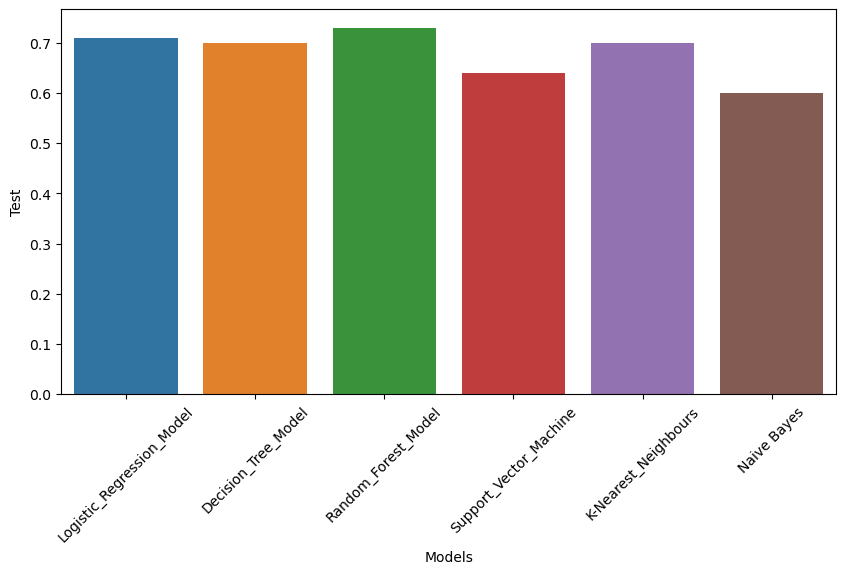

In [91]:
sns.barplot(x='Models', y='Test', data=df)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(rotation=45)
plt.show()

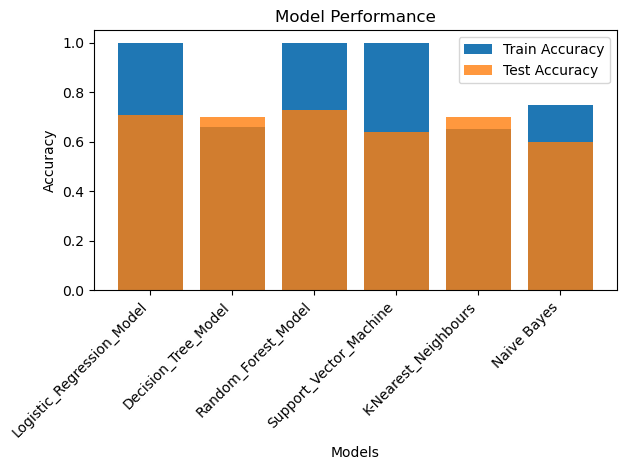

In [92]:
models = ["Logistic_Regression_Model", "Decision_Tree_Model", "Random_Forest_Model", "Support_Vector_Machine", "K-Nearest_Neighbours","Naive Bayes"]
train_accuracies = [1.00, 0.66, 1.00, 1.00, 0.65, 0.75]
test_accuracies = [0.71, 0.70, 0.73, 0.64, 0.70, 0.60]

# Create a bar plot
plt.bar(models, train_accuracies, label='Train Accuracy')
plt.bar(models, test_accuracies, label='Test Accuracy', alpha=0.8)

# Set title and labels
plt.title("Model Performance")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()

# THANK YOU !